Code for examining how HMM performs under repeated recalibration


In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


import sys, glob
[sys.path.append(f) for f in glob.glob('../utils/*')]
from plotting_utils import figSize
from hmm import HMMRecalibration
import hmm_utils
from RTI_utils import RTI
import simulation_utils 
from simulation import simulateBCIFitts

# for a reproducible result
np.random.seed(1)

fig_path = '/home/users/ghwilson/projects/nonstationarities/figures/'
data_dir = '/oak/stanford/groups/shenoy/ghwilson/nonstationarities/simulator/efficiency/'

In [23]:
labels = ['supervised', 'HMM', 'Click HMM', 'RTI']

dicts = list()

for file in glob.glob(data_dir + '/*'):
    file_dict = np.load(file, allow_pickle = True)[0]
    
    for i, label in enumerate(labels):
        d = dict()
        d['ttt']       = file_dict['scores'][-1, i] 
        d['method']    = label
        d['nSimSteps'] = file_dict['nSimSteps']

        dicts.append(d)
        
df = pd.DataFrame(dicts)

## Vanilla HMM vs RTI comparisons

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

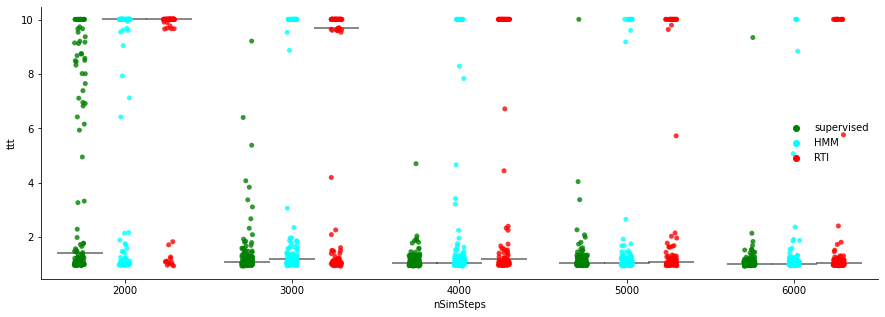

In [26]:
figSize(5, 15)

subset_labels = ['supervised', 'HMM', 'RTI']
colors = ['g', 'cyan', 'r']
cmap   = dict(zip(subset_labels, colors))


scores_df = df[df['method'].isin(subset_labels)]

sns.stripplot(data = scores_df, x = 'nSimSteps', y = 'ttt', 
              hue = 'method', alpha = 0.8, palette = cmap, dodge = True)

ax = plt.gca()

sns.boxplot(medianprops={'ls': '-', 'lw': 2, 'alpha' : 0.6,}, whiskerprops={'visible': False},
            zorder=1, x="nSimSteps", y="ttt", hue='method', data=scores_df, 
            showfliers=False, showbox=False, showcaps=False, ax=ax)

#plt.yscale('log')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:3],labels[3:], frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig(fig_path + 'simulator/HMM_vs_RTI_efficiency', format = 'pdf')
plt.show()

In [28]:
import scipy.stats

for nSteps in np.unique(scores_df['nSimSteps']):
    subset = scores_df[scores_df['nSimSteps'] == nSteps]
    
    print(' \n', 'Time (sec): ', 0.02 * nSteps)
    for i, method1 in enumerate(subset_labels):
        print(f'{method1}: ', np.mean(subset[subset['method'] == method1]['ttt']))
        
    for i, method1 in enumerate(subset_labels):
        for j, method2 in enumerate(subset_labels):
            if i > j:
                stat = scipy.stats.ranksums(subset[subset['method'] == method1]['ttt'], subset[subset['method'] == method2]['ttt'])
                print(f'{method1} vs {method2}: p = ', stat)

 
 Time (sec):  40.0
supervised:  4.002528327873386
HMM:  7.281729050374988
RTI:  9.038836528049403
HMM vs supervised: p =  RanksumsResult(statistic=6.284247867928204, pvalue=3.294447241874565e-10)
RTI vs supervised: p =  RanksumsResult(statistic=9.768058603410816, pvalue=1.5438192203290158e-22)
RTI vs HMM: p =  RanksumsResult(statistic=2.9473392130984473, pvalue=0.0032052138930015496)
 
 Time (sec):  60.0
supervised:  1.4154541353009686
HMM:  3.2667492211630966
RTI:  6.315445604850985
HMM vs supervised: p =  RanksumsResult(statistic=3.5182118556354967, pvalue=0.00043446535931242344)
RTI vs supervised: p =  RanksumsResult(statistic=7.421344352981642, pvalue=1.1593744613569223e-13)
RTI vs HMM: p =  RanksumsResult(statistic=4.052823858011398, pvalue=5.060310214391841e-05)
 
 Time (sec):  80.0
supervised:  1.1740084276539582
HMM:  2.038091801898204
RTI:  4.18583637650552
HMM vs supervised: p =  RanksumsResult(statistic=0.6424641628552136, pvalue=0.5205718508661568)
RTI vs supervised: p = 

## Click HMM vs HMM comparisons

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

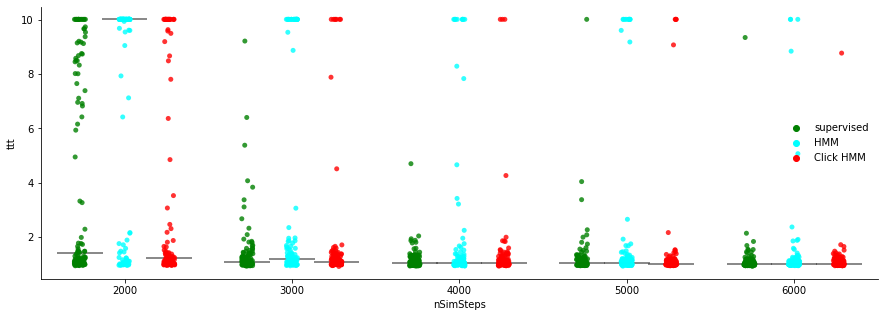

In [32]:
figSize(5, 15)

subset_labels = ['supervised', 'HMM', 'Click HMM']
colors = ['g', 'cyan', 'r']
cmap   = dict(zip(subset_labels, colors))


scores_df = df[df['method'].isin(subset_labels)]

sns.stripplot(data = scores_df, x = 'nSimSteps', y = 'ttt', 
              hue = 'method', alpha = 0.8, palette = cmap, dodge = True)

ax = plt.gca()

sns.boxplot(medianprops={'ls': '-', 'lw': 2, 'alpha' : 0.6,}, whiskerprops={'visible': False},
            zorder=1, x="nSimSteps", y="ttt", hue='method', data=scores_df, 
            showfliers=False, showbox=False, showcaps=False, ax=ax)

#plt.yscale('log')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:3],labels[3:], frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig(fig_path + 'simulator/vanillaHMM_vs_clickHMM_efficiency', format = 'pdf')
plt.show()

In [33]:
import scipy.stats

for nSteps in np.unique(scores_df['nSimSteps']):
    subset = scores_df[scores_df['nSimSteps'] == nSteps]
    
    print(' \n', 'Time (sec): ', 0.02 * nSteps)
    for i, method1 in enumerate(subset_labels):
        for j, method2 in enumerate(subset_labels):
            if i > j:
                stat = scipy.stats.ranksums(subset[subset['method'] == method1]['ttt'], subset[subset['method'] == method2]['ttt'])
                print(f'{method1} vs {method2}: p = ', stat)

 
 Time (sec):  40.0
HMM vs supervised: p =  RanksumsResult(statistic=6.284247867928204, pvalue=3.294447241874565e-10)
Click HMM vs supervised: p =  RanksumsResult(statistic=-0.9297600041320022, pvalue=0.3524953588806311)
Click HMM vs HMM: p =  RanksumsResult(statistic=-6.261933627829035, pvalue=3.802327845124588e-10)
 
 Time (sec):  60.0
HMM vs supervised: p =  RanksumsResult(statistic=3.5182118556354967, pvalue=0.00043446535931242344)
Click HMM vs supervised: p =  RanksumsResult(statistic=0.2110555209379645, pvalue=0.8328439475394087)
Click HMM vs HMM: p =  RanksumsResult(statistic=-3.309945614709928, pvalue=0.0009331410021589002)
 
 Time (sec):  80.0
HMM vs supervised: p =  RanksumsResult(statistic=0.6424641628552136, pvalue=0.5205718508661568)
Click HMM vs supervised: p =  RanksumsResult(statistic=-0.05857488026031614, pvalue=0.9532907189685016)
Click HMM vs HMM: p =  RanksumsResult(statistic=-0.6815140830287577, pvalue=0.49554625873200464)
 
 Time (sec):  100.0
HMM vs supervised: 